In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1cg3Uau29LmA-q5JzurET9dfdRDB8hzJA'}) 
downloaded.GetContentFile('Copy of type1_IFN.txt') 

In [0]:
downloaded = drive.CreateFile({'id':'1V3w5FXC2Vy75NruoXbrJZjdbVZFiUA24'}) 
downloaded.GetContentFile('Copy of PAAD.gct') 

In [8]:
!pip install cmapPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cmapPy.pandasGEXpress.parse import parse
#%matplotlib inline

     |████████████████████████████████| 153kB 2.8MB/s 


In [0]:
from cmapPy.pandasGEXpress.parse import parse

In [0]:
PAAD=parse('Copy of PAAD.gct')

In [11]:
data_paad = PAAD.data_df
data_paad.shape

(18465, 183)

Task 3.

Understand the effect of Interferons in Pancreatic Adenocarcinoma Interferons (IFNs) are a group of signaling proteins made and released by host cells in response to the presence of several pathogens, such as viruses, bacteria, parasites, and also tumor cells. Type I interferons (IFNs) are a large subgroup of interferon proteins that help regulate the activity of the immune system. The genes responsible for type 1 Interferons is called Type 1 IFN signature and consists a set of 25 genes in humans.

● Can you characterize the presence of IFN signature in pancreatic adenocarcinoma tumors by assigning a score to each sample which denotes the positive or negative presence of IFN genes in the sample?

● How is the distribution of this score among the different samples?

● Based on this distribution can we identify the presence of high and low IFN subtypes in the sample cohort?

In [12]:
ifn= pd.read_csv("Copy of type1_IFN.txt")
ifn.columns = ['gene_name']
ifn

,gene_name
0,IFI44
1,IFIT3
2,MX2
3,OAS1
4,OAS3
5,BST2
6,IFITM1
7,MX1
8,STAT1
9,IFI27


In [13]:
expression = []
new_data_paad=data_paad.T
new_data_paad

rid,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,ABCA8,...,ZP3,ZPBP2,ZPLD1,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,6.4,4.7,-1.0,7.5,6.4,14.3,10.6,8.8,1.0,9.4,-1.0,10.2,9.2,4.8,10.2,9.6,11.8,NaN,8.6,8.9,11.3,8.6,7.5,8.1,10.6,10.0,9.4,4.4,5.8,1.8,7.4,1.0,7.8,10.4,9.7,1.0,8.1,7.9,9.3,6.9,...,7.7,NaN,3.9,9.4,9.4,5.5,8.1,4.0,7.2,6.9,9.1,1.5,6.0,8.0,7.3,3.4,8.7,7.1,0.5,6.0,0.5,8.6,7.1,8.8,8.2,8.8,8.1,7.0,8.6,8.1,8.6,6.2,9.0,9.9,NaN,9.2,12.9,10.1,9.3,5.5
aab4-Primary solid Tumor,5.8,5.7,1.1,6.8,NaN,14.0,10.2,5.6,-1.2,9.1,-0.2,10.3,5.0,6.3,10.4,9.8,11.4,0.3,8.4,8.7,11.6,9.0,7.5,8.2,10.2,8.1,9.3,4.9,5.7,6.3,4.9,3.0,8.5,10.9,9.5,0.8,9.0,6.0,9.7,6.7,...,6.6,NaN,5.7,9.6,10.2,5.4,7.9,5.0,7.0,6.1,9.8,3.1,6.0,7.6,6.2,3.7,8.5,7.5,-1.2,5.7,0.8,7.9,6.2,9.2,6.9,9.4,8.1,7.5,8.7,8.1,8.8,5.8,8.5,10.0,NaN,9.3,12.4,9.8,8.9,4.5
aab6-Primary solid Tumor,6.4,3.0,NaN,7.3,10.8,13.1,10.1,0.2,0.2,9.7,NaN,9.2,2.8,5.9,9.9,9.8,11.1,2.2,8.4,8.8,11.4,9.3,6.7,7.3,10.3,7.3,8.4,4.7,6.1,7.4,8.0,1.8,9.2,10.6,8.0,4.1,7.7,5.7,10.4,6.9,...,7.8,NaN,3.0,9.5,10.4,4.9,7.8,5.2,6.6,5.4,9.9,2.9,6.3,7.7,6.6,2.4,7.9,6.9,2.0,5.7,0.8,8.2,5.7,8.8,5.3,8.7,7.3,7.0,8.8,8.4,9.1,3.9,8.1,10.0,-0.8,9.4,13.5,9.8,9.2,4.7
aab8-Primary solid Tumor,5.8,5.1,NaN,7.5,4.1,13.8,8.6,3.2,-0.1,9.6,-0.1,9.4,7.7,6.4,10.5,9.2,11.6,-0.1,8.7,9.1,11.4,9.4,7.7,7.8,10.1,8.3,8.4,5.4,6.6,7.3,7.1,NaN,9.0,10.0,7.9,5.2,7.6,6.7,10.4,7.7,...,6.6,NaN,0.9,9.7,10.6,5.7,8.0,6.0,7.6,6.5,9.2,0.9,5.9,7.1,6.8,4.0,8.9,7.4,4.2,6.1,2.5,8.0,6.1,9.8,6.3,8.8,8.0,7.4,8.6,8.6,8.9,5.2,8.5,9.7,1.9,9.4,12.5,9.7,9.3,6.4
aab9-Primary solid Tumor,6.7,4.4,0.1,7.4,9.3,14.6,10.1,5.7,NaN,9.8,NaN,9.3,7.0,6.5,10.1,9.8,11.2,0.1,8.4,9.3,11.4,9.4,7.2,8.3,10.3,8.6,9.4,5.9,6.2,6.1,6.0,1.7,8.7,10.0,9.3,3.3,8.8,7.7,9.2,6.4,...,8.1,0.1,4.9,9.7,9.7,4.8,8.1,5.1,7.3,6.2,10.1,2.4,5.7,7.9,7.0,4.3,8.6,8.0,1.7,6.1,0.1,8.4,7.0,9.9,6.9,8.6,8.0,7.0,8.9,8.2,8.4,5.9,8.6,9.9,0.1,9.3,13.0,10.1,9.2,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a89d-Solid Tissue Normal,7.1,3.6,2.0,6.7,1.0,14.9,10.5,2.7,1.3,9.2,NaN,9.5,5.4,5.5,9.9,10.0,11.3,-1.0,8.4,9.2,11.4,8.9,6.8,8.3,10.3,7.4,8.7,6.2,5.8,2.9,4.4,2.3,10.6,10.5,8.8,2.4,8.0,8.4,9.3,9.2,...,6.4,NaN,6.5,9.7,9.8,4.9,8.0,4.0,6.8,5.7,10.0,2.0,5.9,7.4,6.5,3.7,8.1,7.2,1.0,5.5,NaN,7.9,6.7,9.9,5.4,9.3,8.2,7.3,8.2,7.7,7.8,5.3,8.4,9.5,0.6,9.4,13.6,10.2,8.5,7.2
a89d-Primary solid Tumor,7.3,6.2,0.0,6.7,2.8,14.5,9.8,4.3,1.8,9.2,-1.0,10.1,7.5,6.2,10.0,9.5,11.5,NaN,8.3,8.9,11.7,9.0,7.0,8.4,10.3,7.9,10.1,5.8,6.6,4.8,5.2,1.4,9.5,10.9,9.5,2.4,8.5,8.1,9.8,8.1,...,6.7,-1.0,5.2,9.3,10.2,5.1,7.9,4.7,7.0,5.4,9.6,2.0,5.7,7.2,6.6,4.8,8.2,7.1,4.7,5.2,-1.0,7.9,6.0,9.5,6.9,8.8,7.5,6.9,8.2,7.5,7.9,5.3,8.8,9.5,NaN,9.6,13.1,9.9,8.8,5.1
a8sy-Primary solid Tumor,7.9,1.2,NaN,6.5,10.5,13.0,10.8,0.8,NaN,9.3,3.1,9.5,7.9,6.2,9.7,9.6,11.6,0.8,8.6,9.5,11.2,8.7,6.9,8.2,10.5,9.2,7.6,4.2,6.4,6.9,6.2,2.4,10.4,10.3,6.3,5.6,7.5,6.5,8.2,3.9,...,7.4,NaN,3.6,9.6,10.5,3.5,8.5,4.9,6.8,6.3,9.3,1.8,5.6,7.4,6.3,3.7,8.3,7.5,3.1,5.2,-0.8,8.1,6.6,10.6,3.5,9.1,7.3,7.0,8.1,8.4,9.4,5.0,8.2,9.4,-0.8,9.2,13.2,9.8,8.6,5.9


In [14]:
for gene in ifn.gene_name:
    
    expression.append(gene)
    
exp_data = new_data_paad[expression]
exp_data

rid,IFI44,IFIT3,MX2,OAS1,OAS3,BST2,IFITM1,MX1,STAT1,IFI27,CXCL10,IFI16,IFI30,IFIH1,IFIT2,IFITM2,IRF1,IRF9,IRGM,ISG15,OAS2,PSME1,SOCS1,STAT2
cid,,,,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,9.4,10.0,9.8,11.7,11.3,12.2,11.2,11.5,12.2,13.5,9.4,11.0,11.7,9.5,8.6,11.2,10.8,11.4,0.5,11.7,11.5,12.3,7.7,11.2
aab4-Primary solid Tumor,11.1,10.8,10.7,11.0,11.9,12.7,12.9,12.4,12.7,13.8,8.7,11.3,12.3,10.2,8.9,12.3,11.2,11.4,-1.2,11.7,11.0,12.3,7.4,11.3
aab6-Primary solid Tumor,11.2,11.6,11.0,11.3,12.0,12.7,12.5,12.6,12.9,14.4,8.8,12.3,12.1,10.3,10.5,11.3,9.8,11.4,-0.8,13.9,11.8,12.0,7.9,12.0
aab8-Primary solid Tumor,10.6,10.3,10.8,10.5,11.0,11.9,12.0,12.9,12.5,13.2,7.2,12.3,12.0,10.1,9.4,12.3,10.4,10.8,NaN,11.8,11.4,11.7,6.8,11.7
aab9-Primary solid Tumor,8.8,9.0,8.3,9.2,9.7,10.4,10.6,10.3,11.6,12.0,6.6,11.2,11.9,9.5,8.3,11.9,10.2,10.6,NaN,9.7,9.1,11.7,7.4,11.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a89d-Solid Tissue Normal,8.9,9.1,9.3,10.5,10.1,12.2,11.9,11.0,11.5,12.5,6.1,11.9,14.6,9.0,8.2,12.5,10.4,10.4,-1.0,10.9,10.1,11.9,7.2,11.3
a89d-Primary solid Tumor,9.3,9.6,10.0,10.9,10.4,12.5,11.9,11.2,11.8,13.0,8.1,11.3,12.4,9.6,8.9,12.2,10.4,10.3,0.6,11.3,10.5,12.0,7.2,11.1
a8sy-Primary solid Tumor,10.6,10.5,11.4,11.1,11.1,12.9,12.2,12.6,12.2,14.3,8.5,12.0,12.3,9.5,8.9,11.7,10.7,10.5,NaN,12.7,11.3,11.5,7.3,11.8


In [15]:
exp_data.shape

(183, 24)

In [16]:
!pip install gsva 
from GSVA import gsva
from sklearn.manifold import TSNE

In [17]:
exp_data.isnull().sum()

rid
IFI44      0
IFIT3      0
MX2        0
OAS1       0
OAS3       0
BST2       0
IFITM1     0
MX1        0
STAT1      0
IFI27      0
CXCL10     0
IFI16      0
IFI30      0
IFIH1      0
IFIT2      0
IFITM2     0
IRF1       0
IRF9       0
IRGM      62
ISG15      0
OAS2       0
PSME1      0
SOCS1      0
STAT2      0
dtype: int64

In [18]:
exp_data['IRGM'].unique()

array([ 0.5       , -1.20000005, -0.80000001,         nan,  0.30000001,
       -0.69999999,  0.1       ,  0.80000001,  1.39999998,  1.89999998,
        1.70000005, -1.29999995, -0.1       , -1.        ,  0.        ,
       -0.60000002, -1.39999998, -0.2       ,  1.29999995,  0.60000002,
        1.        , -0.5       ,  1.79999995, -0.40000001, -0.89999998,
       -0.30000001,  0.69999999,  0.40000001,  0.89999998,  1.10000002,
        1.5       ,  1.60000002, -1.70000005, -1.89999998, -1.60000002,
       -1.5       ,  2.29999995, -1.10000002,  2.        ,  2.20000005,
        1.20000005,  3.70000005])

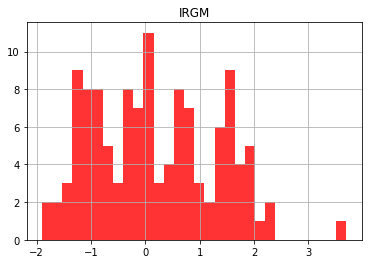

In [19]:
exp_data.hist(column = ['IRGM'], bins = 30, color = 'red', alpha = 0.8)
plt.show()

As too many null value and large varation in value, so its better to drop this gene.

In [20]:
exp_data.drop('IRGM',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
exp_data.shape

(183, 23)

In [22]:
exp_data.index.value_counts()

a89d-Solid Tissue Normal    1
a8rm-Primary solid Tumor    1
a8t5-Primary solid Tumor    1
aaul-Primary solid Tumor    1
7922-Primary solid Tumor    1
                           ..
aa8x-Primary solid Tumor    1
7889-Primary solid Tumor    1
aaql-Primary solid Tumor    1
7893-Primary solid Tumor    1
7891-Primary solid Tumor    1
Name: cid, Length: 183, dtype: int64

In [23]:
exp_data["Tumor_type"] = exp_data.index.str.split('-').str[-1]
exp_data["ID"] = exp_data.index.str.split('-').str[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
exp_data.shape

(183, 25)

In [26]:
def show_all(df, nrow=None, ncol=None):
    with pd.option_context('display.max_columns', ncol):
        display(df)
show_all(exp_data.head())

rid,IFI44,IFIT3,MX2,OAS1,OAS3,BST2,IFITM1,MX1,STAT1,IFI27,CXCL10,IFI16,IFI30,IFIH1,IFIT2,IFITM2,IRF1,IRF9,ISG15,OAS2,PSME1,SOCS1,STAT2,Tumor_type,ID
cid,,,,,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,9.4,10.0,9.8,11.7,11.3,12.2,11.2,11.5,12.2,13.5,9.4,11.0,11.7,9.5,8.6,11.2,10.8,11.4,11.7,11.5,12.3,7.7,11.2,Primary solid Tumor,aab1
aab4-Primary solid Tumor,11.1,10.8,10.7,11.0,11.9,12.7,12.9,12.4,12.7,13.8,8.7,11.3,12.3,10.2,8.9,12.3,11.2,11.4,11.7,11.0,12.3,7.4,11.3,Primary solid Tumor,aab4
aab6-Primary solid Tumor,11.2,11.6,11.0,11.3,12.0,12.7,12.5,12.6,12.9,14.4,8.8,12.3,12.1,10.3,10.5,11.3,9.8,11.4,13.9,11.8,12.0,7.9,12.0,Primary solid Tumor,aab6
aab8-Primary solid Tumor,10.6,10.3,10.8,10.5,11.0,11.9,12.0,12.9,12.5,13.2,7.2,12.3,12.0,10.1,9.4,12.3,10.4,10.8,11.8,11.4,11.7,6.8,11.7,Primary solid Tumor,aab8
aab9-Primary solid Tumor,8.8,9.0,8.3,9.2,9.7,10.4,10.6,10.3,11.6,12.0,6.6,11.2,11.9,9.5,8.3,11.9,10.2,10.6,9.7,9.1,11.7,7.4,11.1,Primary solid Tumor,aab9


In [27]:
exp_data.Tumor_type.value_counts()

Primary solid Tumor    178
Solid Tissue Normal      4
Metastatic               1
Name: Tumor_type, dtype: int64

In [0]:
exp_data.reset_index(drop=True, inplace=True)

In [29]:
exp_data.describe()

rid,IFI44,IFIT3,MX2,OAS1,OAS3,BST2,IFITM1,MX1,STAT1,IFI27,CXCL10,IFI16,IFI30,IFIH1,IFIT2,IFITM2,IRF1,IRF9,ISG15,OAS2,PSME1,SOCS1,STAT2
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,9.249728,9.569943,9.486339,10.130602,10.568310,11.354644,11.492893,10.992351,11.974315,12.139895,6.847540,11.358471,11.954101,9.340983,8.561201,11.943168,10.436609,10.609838,10.284157,10.220222,11.859014,6.890711,11.078141
std,1.242643,1.106238,1.144063,1.166023,1.011354,1.102429,1.151732,1.235841,0.801816,1.542972,1.953718,0.992733,1.069185,0.748047,0.968897,0.886185,0.639817,0.572071,1.458669,1.247228,0.454541,1.013411,0.479999
min,4.100000,6.400000,4.900000,5.100000,7.200000,7.300000,7.100000,7.000000,9.200000,6.800000,-1.000000,6.700000,8.200000,6.600000,5.300000,7.900000,8.500000,8.700000,6.800000,5.800000,10.500000,3.400000,9.600000
25%,8.600000,8.950000,8.850000,9.400000,10.000000,10.800000,10.850000,10.250000,11.550000,11.250000,5.500000,11.150000,11.350000,8.900000,8.000000,11.500000,10.100000,10.300000,9.350000,9.500000,11.600000,6.300000,10.800000
50%,9.200000,9.600000,9.500000,10.200000,10.500000,11.400000,11.500000,10.900000,12.000000,12.300000,6.900000,11.500000,12.000000,9.400000,8.700000,12.100000,10.400000,10.600000,10.200000,10.200000,11.900000,6.900000,11.100000
75%,10.000000,10.250000,10.200000,10.800000,11.200000,12.100000,12.150000,11.800000,12.400000,13.200000,8.150000,11.900000,12.700000,9.800000,9.200000,12.500000,10.800000,11.000000,11.050000,11.100000,12.100000,7.400000,11.400000
max,12.300000,12.200000,11.900000,12.800000,12.900000,14.000000,14.500000,13.800000,14.100000,15.800000,12.100000,12.600000,15.500000,11.200000,11.300000,13.900000,12.200000,11.900000,14.800000,12.900000,13.400000,11.100000,12.400000


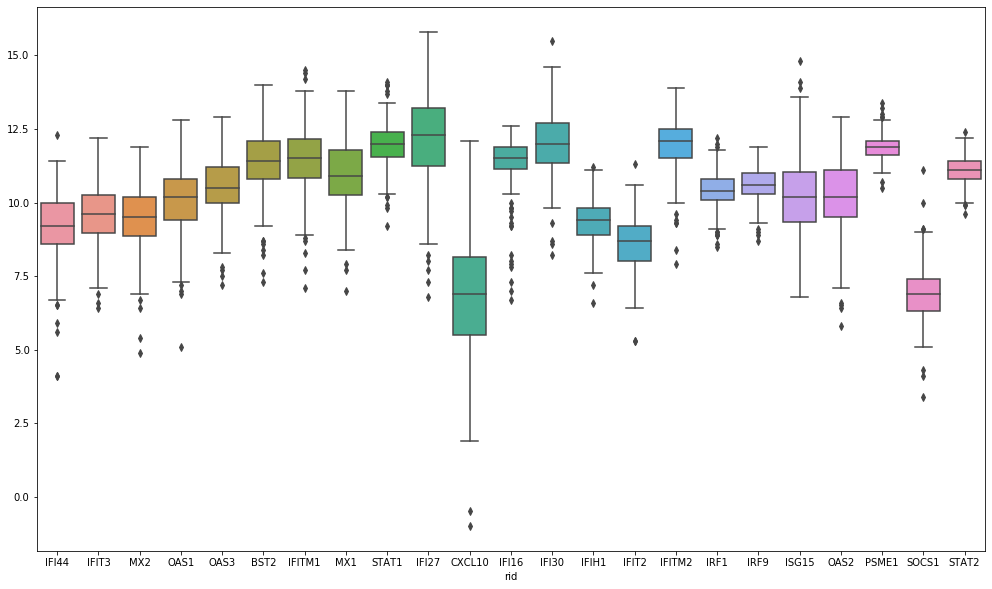

In [30]:
plt.figure(figsize=(17,10))
sns.boxplot(data=exp_data)

In [0]:
from GSVA import gsva, gmt_to_dataframe
from sklearn.manifold import TSNE
from plotnine import *

In [32]:
exp_data['Tumor_type'].replace("Primary solid Tumor",1,inplace=True)
exp_data['Tumor_type'].replace("Solid Tissue Normal",2,inplace=True)
exp_data['Tumor_type'].replace("Metastatic",3,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [33]:
exp_data.drop('ID',axis=1,inplace=True)
X=exp_data.drop(['Tumor_type'], axis=1)
y=exp_data.Tumor_type
from sklearn.preprocessing import StandardScaler
sim = StandardScaler()
X=sim.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


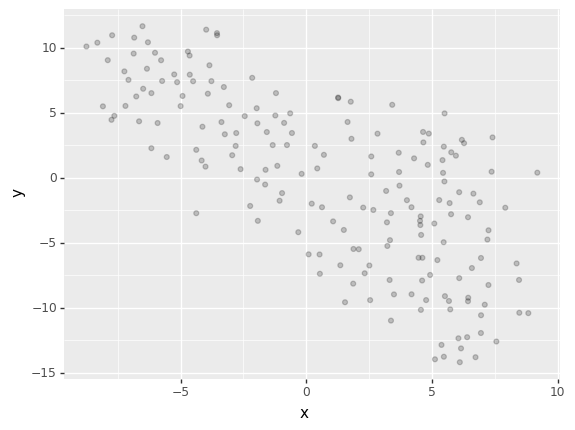

<ggplot: (-9223363278040824895)>

In [34]:
XV = TSNE(n_components=2).\
    fit_transform(exp_data)
df = pd.DataFrame(XV).rename(columns={0:'x',1:'y'})
(ggplot(df,aes(x='x',y='y'))
 + geom_point(alpha=0.2)
)

In [54]:
# Load IFNS 
ifns = []
with open('Copy of type1_IFN.txt', 'r') as f:
    ifns = f.read().split('\n')
print('ifns :', len(ifns))
check = True
for ifn in ifns:
    check = check and ifn in data_paad.columns
print('all present :', check)

ifns : 26
all present : False


In [76]:
import os
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


E: Package 'python-software-properties' has no installation candidate


KeyboardInterrupt: ignored

In [79]:
!mkdir drive
!google-drive-ocamlfuse drive



mkdir: cannot create directory ‘drive’: File exists
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [84]:

import argparse, sys, os
import pandas as pd 
# from tempfile import mkdtemp, gettempdir
from subprocess import Popen, PIPE
import subprocess

# R GSVA function call params:
method='gsva'
kcdf='Gaussian'
abs_ranking=False
min_sz=1
max_sz=None
parallel_sz=0
parallel_type="SOCK"
mx_diff_options=[True, False] 
tau=None
ssgsea_norm=True
verbose=False
tempdir= None

df = data_paad.T
genset = pd.DataFrame(data={'name': ['type1ifn' for i in range(len(ifns))], 'member': ifns})

try:
    
    !mkdir temp
    !google-drive-ocamlfuse drive


except FileExistsError:
    pass
df.to_csv('temp/expr.csv')

members = genset['member'].unique()
genset = genset.groupby(['name']).apply(lambda x: "\t".join(sorted(list(x['member'])))).reset_index().rename(columns={0:'members'})
# Write our gene sets
with open('temp/gs.gmt','w') as f:
    for row in genset.itertuples():
        name = row.name
        description = 'description'
        fields = row.members
        f.write(name+"\t"+description+"\t"+fields+"\n")
cur = os.path.dirname(os.path.realpath('__file__'))
temp = os.path.join(os.path.dirname(os.path.realpath('__file__')), 'temp')
rscript = os.path.join(cur, 'gsva.r')
for mx_diff in mx_diff_options:
    cmd = ["Rscript", rscript]
    cmd += [str(x) for x in [method,kcdf,abs_ranking,min_sz,max_sz,parallel_sz,parallel_type,mx_diff,tau,ssgsea_norm,verbose,temp]]
    print('Rscript command to execute : ')
    print(cmd)
    result = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)
    print(result.stdout.decode('utf-8'))
    

mkdir: cannot create directory ‘temp’: File exists
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
Rscript command to execute : 
['Rscript', '/content/gsva.r', 'gsva', 'Gaussian', 'False', '1', 'None', '0', 'SOCK', 'True', 'None', 'True', 'False', '/content/temp']

Rscript command to execute : 
['Rscript', '/content/gsva.r', 'gsva', 'Gaussian', 'False', '1', 'None', '0', 'SOCK', 'False', 'None', 'True', 'False', '/content/temp']



In [85]:
gsva_scores = pd.read_csv('temp/gsva_scores_mx_diff_t.csv').iloc[:,1:]
gsva_scores = gsva_scores.append(pd.read_csv('temp/gsva_scores_mx_diff_f.csv').iloc[:,1:])
gsva_scores.index = ['mx_diff_true', 'mx_diff_false']
gsva_scores

FileNotFoundError: ignored

In [87]:
exp_data['Tumor_type'].replace("Primary solid Tumor",1,inplace=True)
exp_data['Tumor_type'].replace("Solid Tissue Normal",2,inplace=True)
exp_data['Tumor_type'].replace("Metastatic",3,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [89]:
from sklearn.model_selection import train_test_split

seed = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

print(X.shape)
print(y.shape)

(183, 23)
(183,)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = []
models.append(('LR', LinearRegression()))
models.append(('SVR', SVR()))
models.append(('DTR', DecisionTreeRegressor(random_state=seed)))
models.append(('RFR (100 Trees)', RandomForestRegressor(n_estimators=100, random_state=seed)))

In [0]:
def myplot(XX, yy):
    from sklearn.model_selection import ShuffleSplit
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=seed)

    results = []
    names = []

    for name, model in models:
        cv_results = cross_val_score(model, XX, yy, cv = cv, scoring = make_scorer(r2_score))
        results.append(cv_results)
        names.append(name)
        msg = "%s: %.3f (+/- %.3f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    fig = plt.figure()
    fig.suptitle('R2')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

LR: -0.106 (+/- 0.174)
SVR: 0.034 (+/- 0.121)
DTR: 0.181 (+/- 0.410)
RFR (100 Trees): 0.068 (+/- 0.138)


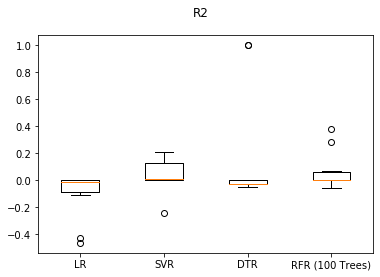

In [92]:
myplot(X_train, y_train)